In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [63]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [64]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [65]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [67]:
x_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [68]:
x_train['Age_imputed'] = x_train['Age']
x_test['Age_imputed'] = x_test['Age']

In [69]:
x_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [70]:
x_train['Age_imputed'][x_train['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
x_test['Age_imputed'][x_test['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

In [71]:
x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

array([21.  , 26.  , 30.  , 35.  , 56.  , 39.  , 23.  , 16.  , 63.  ,
        4.  , 26.  , 22.  , 19.  , 16.  , 50.  , 33.  , 42.  , 54.  ,
       46.  , 27.  , 42.  , 17.  , 24.  , 30.  , 56.  , 59.  , 26.  ,
       21.  , 22.  , 29.  ,  2.  , 29.  , 56.  , 36.  , 45.5 , 24.  ,
       21.  ,  3.  ,  4.  , 35.  , 28.  , 62.  , 30.  , 18.  , 17.  ,
       38.  , 36.  , 42.  , 16.  , 40.  , 11.  , 24.  , 47.  , 17.  ,
       27.  , 36.  , 32.  , 30.  , 19.  , 23.  ,  3.  , 36.  , 27.  ,
       48.  , 49.  , 25.  , 31.  , 24.  , 54.  ,  9.  ,  9.  , 28.5 ,
       40.  , 29.  , 21.  , 32.5 ,  5.  ,  8.  , 33.  , 52.  , 21.  ,
       26.  , 19.  , 43.  , 61.  , 18.  , 22.  , 32.  , 45.  ,  7.  ,
       19.  , 31.  , 20.  , 45.  , 34.  , 31.  , 20.  , 36.  , 32.  ,
        6.  , 24.  , 16.  , 24.  ,  4.  , 45.  , 13.  , 27.  ,  2.  ,
       16.  , 30.  ,  0.83, 70.  , 24.  , 22.  ,  3.  ,  2.  ,  5.  ,
        6.  , 16.  , 25.  , 36.  , 28.  , 16.  , 33.  , 31.  , 26.  ,
       33.  , 38.  ,

In [72]:
x_train['Age'].isnull().sum()

148

In [73]:
x_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.00
10,4.0,16.7000,4.00
873,47.0,9.0000,47.00
182,9.0,31.3875,9.00
876,20.0,9.8458,20.00
...,...,...,...
534,30.0,8.6625,30.00
584,NaN,8.7125,0.75
493,71.0,49.5042,71.00
527,NaN,221.7792,66.00


C:\Users\emon1\AppData\Local\Temp\ipykernel_1236\3583556620.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label='Original',hist=False)


<Axes: xlabel='Age', ylabel='Density'>

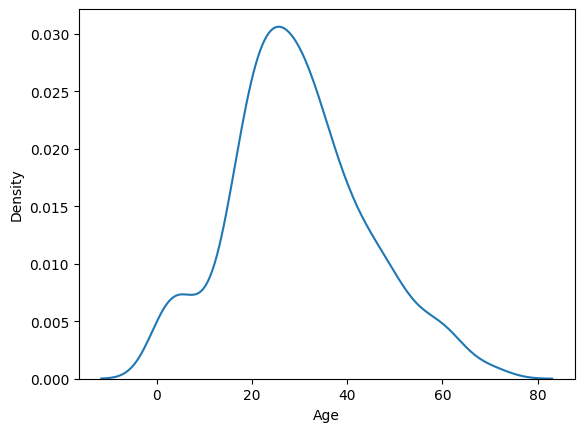

In [74]:
sns.distplot(x_train['Age'],label='Original',hist=False)

In [75]:
print('Original variable variance: ', x_train['Age'].var())
print('Variance after random imputation: ', x_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  204.64527471040947


In [76]:
x_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,70.870857
Age,71.512440,204.349513,204.349513
Age_imputed,70.870857,204.349513,204.645275


<Axes: >

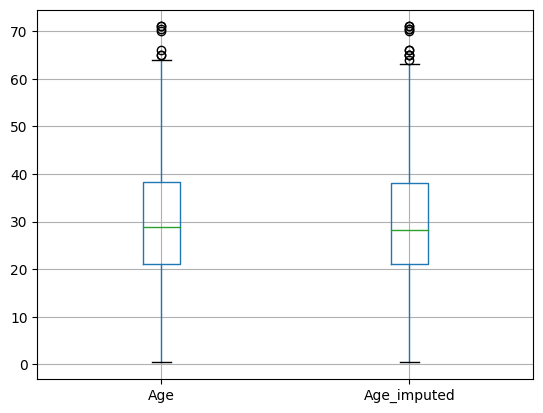

In [77]:
x_train[['Age','Age_imputed']].boxplot()

In [78]:
observation = {'Fare': 71.83}

In [79]:
sampled_value = x_train['Age'].dropna().sample(1,random_state=int(observation['Fare']))

In [80]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [81]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [82]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [83]:
x = data
y = data['SalePrice']

In [84]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [85]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [86]:
x_train.sample(5)

,Age,Fare,Age_imputed
306,NaN,110.8833,24.0
657,32.0,15.5000,32.0
127,24.0,7.1417,24.0
823,27.0,12.4750,27.0
524,NaN,7.2292,36.0


In [87]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\emon1\AppData\Local\Temp\ipykernel_1236\856878696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
C:\Users\emon1\AppData\Local\Temp\ipykernel_1236\856878696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
C:\Users\emon1\AppData\Local\Temp\ipykernel_1236\856878696.py:4: SettingWithCopyWarning: 
A value

In [88]:
temp = pd.concat(
    [X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
    X_train['GarageQual_imputed'].value_counts() / len(X_train)
    ],
    axis=1)

temp.columns = ['original', 'imputed']

In [89]:
temp

,original,imputed
TA,0.951043,0.950342
Fa,0.037171,0.037671
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [90]:
temp = pd.concat(
    [X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
    X_train['FireplaceQu_imputed'].value_counts() / len(df)
    ],
    axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.652076
TA,0.412439,0.538721
Fa,0.040917,0.052750
Po,0.027823,0.035915
Ex,0.024550,0.031425


C:\Users\emon1\AppData\Local\Temp\ipykernel_1236\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
C:\Users\emon1\AppData\Local\Temp\ipykernel_1236\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6

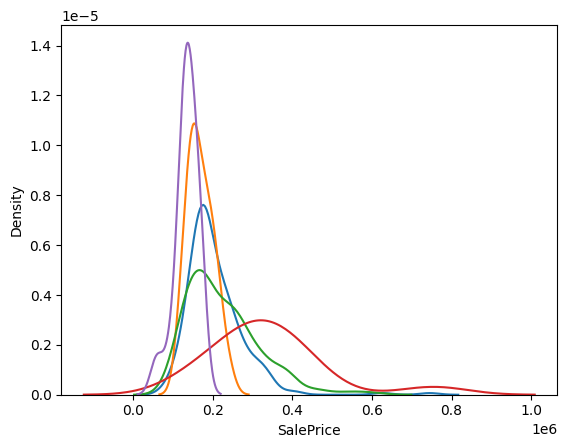

In [91]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\emon1\AppData\Local\Temp\ipykernel_1236\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
C:\Users\emon1\AppData\Local\Temp\ipykernel_1236\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974

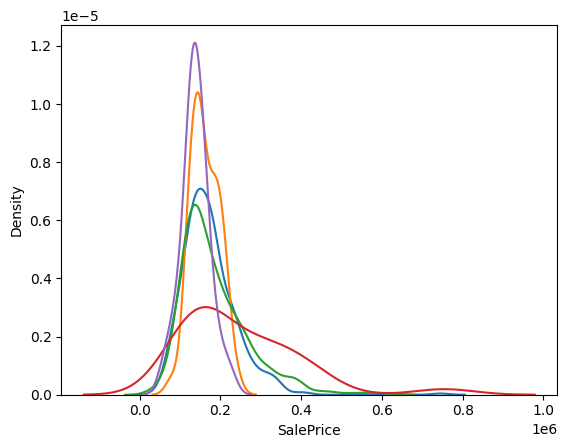

In [92]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()

# Automatically select imputer parameters

In [113]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [114]:
df = pd.read_csv('train.csv')

In [115]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [117]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [118]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [119]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [120]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
30,1,male,40.0,0,0,27.7208,C
10,3,female,4.0,1,1,16.7000,S
873,3,male,47.0,0,0,9.0000,S
182,3,male,9.0,4,2,31.3875,S
876,3,male,20.0,0,0,9.8458,S


In [121]:
numerical_features =['Age','Fare']
numerical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

categorical_features = ['Embarked','Sex']
categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

In [122]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',numerical_transformer,numerical_features),
        ('cat',categorical_transformer,categorical_features)
    ]
)

In [123]:
clf = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',LogisticRegression())
])

In [124]:
from sklearn import set_config

set_config(display='diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex'])])),
                ('classifier', LogisticRegression())])

In [125]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__C': [0.1, 1.0, 10, 100]
}

grid_search = GridSearchCV(clf, param_grid, cv=10)

In [126]:
grid_search.fit(x_train,y_train)
print(f'Best params')
print(grid_search.best_params_)

Best params
{'classifier__C': 1.0, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}


In [127]:
print(f"Internal CV score: {grid_search.best_score_:.3f}")

Internal CV score: 0.788


In [128]:
import pandas as pd

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[['param_classifier__C','param_preprocessor__cat__imputer__strategy','param_preprocessor__num__imputer__strategy','mean_test_score']]

,param_classifier__C,param_preprocessor__cat__imputer__strategy,param_preprocessor__num__imputer__strategy,mean_test_score
4,1.0,most_frequent,mean,0.787852
5,1.0,most_frequent,median,0.787852
6,1.0,constant,mean,0.787852
7,1.0,constant,median,0.787852
8,10.0,most_frequent,mean,0.787852
9,10.0,most_frequent,median,0.787852
10,10.0,constant,mean,0.787852
11,10.0,constant,median,0.787852
12,100.0,most_frequent,mean,0.787852
13,100.0,most_frequent,median,0.787852
